In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [17]:
d = pd.read_csv('data/Individual_train_data.csv')
d.drop('Unnamed: 0',axis=1,inplace=True)
d.head(10)

,Line,Client,Destination,Placement Time,Completion Time,Removal Time,Loading dtn,Removal dtn,JNPT loading,GTI loading,NSICT loading,BMCT loading,Total loading,JNPT unloading,GTI unloading,NSICT unloading,BMCT unloading,Total unloading
0,1,CONR,DRTA,2021-12-31 06:20:00,2022-01-01 08:15:00,2022-01-01 09:10:00,1.916667,0.916667,4.0,32.0,14.0,40.0,90,8.0,13.0,23.0,36.0,80.0
1,8,CONR,SNF,2021-12-31 08:05:00,2022-01-01 08:30:00,2022-01-01 09:05:00,0.416667,0.583333,7.0,0.0,53.0,30.0,90,0.0,7.0,68.0,6.0,81.0
2,B4,CONR,MB,2021-12-31 23:30:00,2022-01-01 07:30:00,2022-01-01 08:05:00,8.000000,0.583333,0.0,0.0,0.0,90.0,90,0.0,36.0,43.0,11.0,90.0
3,G1,CONR,BNGD,2022-01-01 02:40:00,2022-01-01 10:45:00,2022-01-01 12:30:00,8.083333,1.750000,6.0,60.0,24.0,0.0,90,3.0,28.0,43.0,16.0,90.0
4,B1,CONR,DLB,2022-01-01 05:50:00,2022-01-01 19:15:00,2022-01-01 20:20:00,13.416667,1.083333,2.0,10.0,0.0,78.0,90,16.0,18.0,25.0,31.0,90.0
5,G3,CONR,TKD,2022-01-01 07:30:00,2022-01-01 14:30:00,2022-01-01 15:30:00,7.000000,1.000000,0.0,90.0,0.0,0.0,90,0.0,77.0,6.0,7.0,90.0
6,B4,CONR,BRC,2022-01-01 11:15:00,2022-01-01 23:45:00,2022-01-02 05:15:00,12.500000,5.500000,0.0,0.0,0.0,90.0,90,0.0,11.0,23.0,56.0,90.0
7,G1,CONR,DRTA,2022-01-01 13:50:00,2022-01-01 23:50:00,2022-01-02 03:20:00,10.000000,3.500000,0.0,20.0,36.0,4.0,60,0.0,0.0,12.0,78.0,90.0
8,G3,CONR,DER,2022-01-01 16:30:00,2022-01-01 23:55:00,2022-01-02 02:15:00,7.416667,2.333333,7.0,53.0,20.0,0.0,80,0.0,34.0,30.0,16.0,80.0
9,5,NCP 01,MRWN,2021-12-31 18:20:00,2022-01-01 02:20:00,2022-01-01 03:05:00,8.000000,0.750000,0.0,0.0,77.0,13.0,90,2.0,9.0,51.0,28.0,90.0


In [18]:
d.columns

Index(['Line', 'Client', 'Destination', 'Placement Time', 'Completion Time',
       'Removal Time', 'Loading dtn', 'Removal dtn', 'JNPT loading',
       'GTI loading', 'NSICT loading', 'BMCT loading', 'Total loading',
       'JNPT unloading', 'GTI unloading', 'NSICT unloading', 'BMCT unloading',
       'Total unloading'],
      dtype='object')

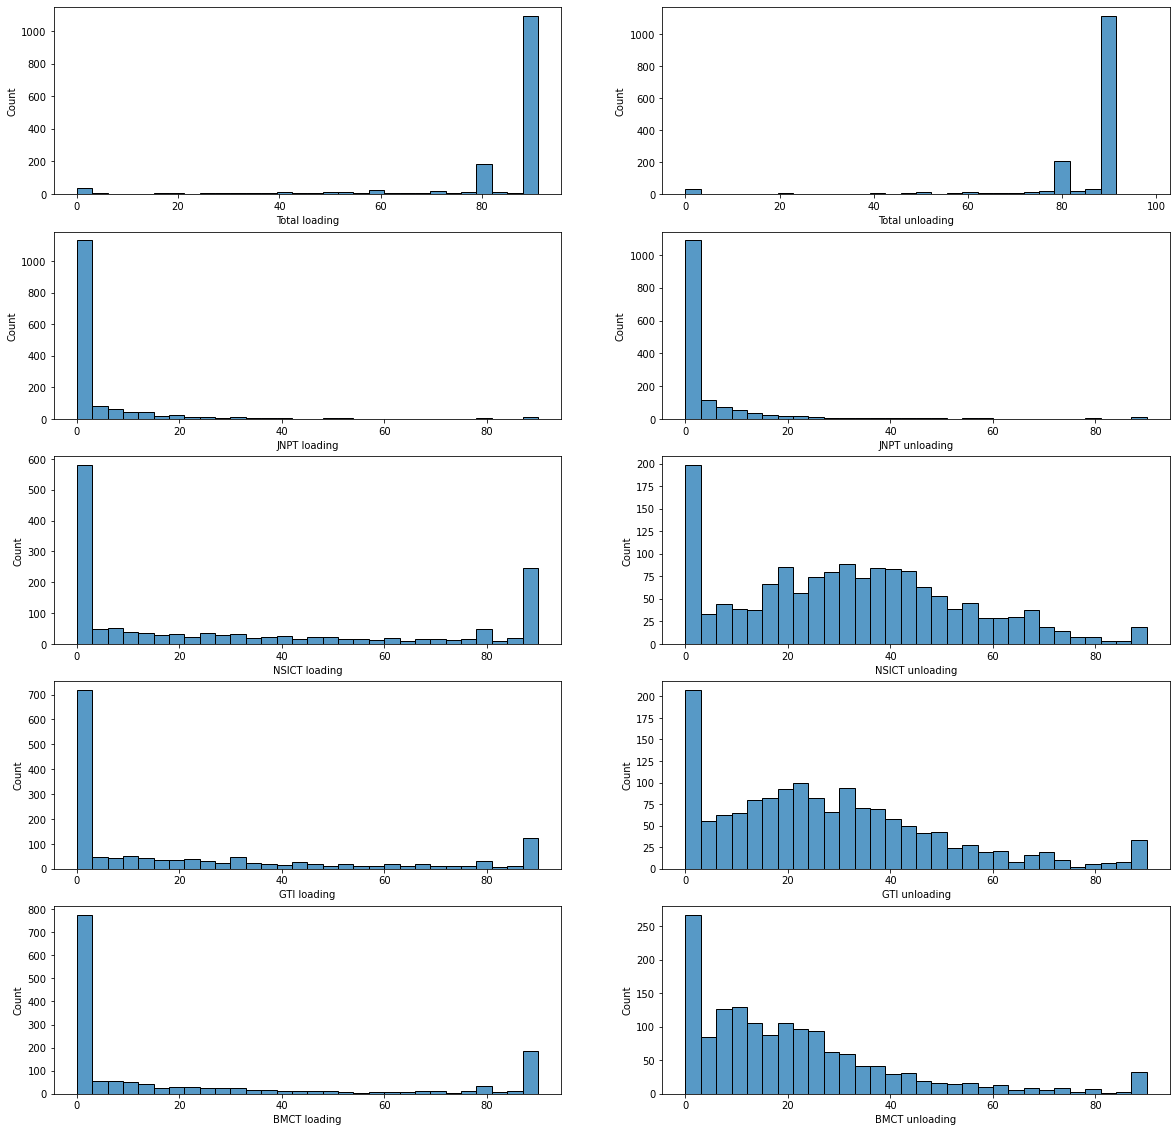

In [19]:
ports = ['JNPT','NSICT','GTI','BMCT']
fig = plt.figure(figsize=(20,20))
nbins = 30
#fig.subplots_adjust(hspace=5, wspace=5)
k = 1
ax = fig.add_subplot(5, 2, k)
sns.histplot(data=d,x='Total loading',bins=nbins)
k += 1
ax = fig.add_subplot(5, 2, k)
sns.histplot(data=d,x='Total unloading',bins=nbins)
k += 1
for p in ports:
    ax = fig.add_subplot(5, 2, k)
    sns.histplot(data=d,x=p+' loading',bins=nbins)
    k += 1
    ax = fig.add_subplot(5, 2, k)
    sns.histplot(data=d,x=p+' unloading',bins=nbins)
    k += 1

plt.show()


In [20]:
lines = d['Line'].unique()
print(sorted(lines))

['1', '2', '4', '5', '6', '8', 'B1', 'B2', 'B3', 'B4', 'C1', 'C2', 'G1', 'G2', 'G3']


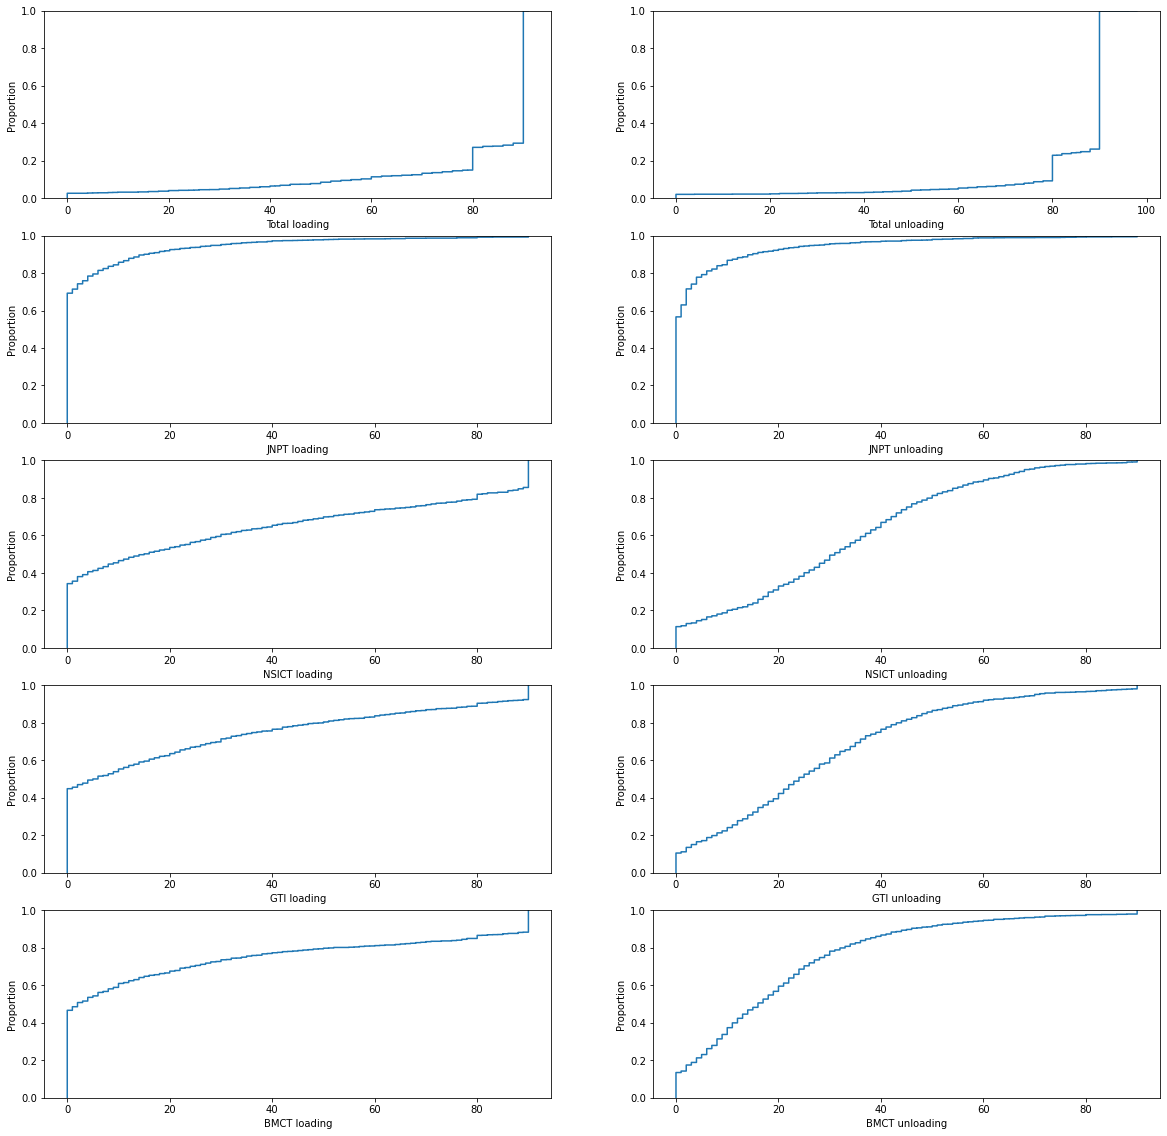

In [21]:
ports = ['JNPT','NSICT','GTI','BMCT']
fig = plt.figure(figsize=(20,20))
nbins = 30
#fig.subplots_adjust(hspace=5, wspace=5)
k = 1
ax = fig.add_subplot(5, 2, k)
sns.ecdfplot(data=d,x='Total loading')
k += 1
ax = fig.add_subplot(5, 2, k)
sns.ecdfplot(data=d,x='Total unloading')
k += 1
for p in ports:
    ax = fig.add_subplot(5, 2, k)
    sns.ecdfplot(data=d,x=p+' loading')
    k += 1
    ax = fig.add_subplot(5, 2, k)
    sns.ecdfplot(data=d,x=p+' unloading')
    k += 1

plt.show()

In [22]:
ports = ['JNPT','NSICT','GTI','BMCT']
d['max port loading'] =d[[i+' loading' for i in ports]].apply(np.max,axis=1)
d['max percent port loading'] = d['max port loading']/d['Total loading']*100.0
d.head()

d['max port unloading'] =d[[i+' unloading' for i in ports]].apply(np.max,axis=1)
d['max percent port unloading'] = d['max port unloading']/d['Total unloading']*100.0
d.head()

,Line,Client,Destination,Placement Time,Completion Time,Removal Time,Loading dtn,Removal dtn,JNPT loading,GTI loading,NSICT loading,BMCT loading,Total loading,JNPT unloading,GTI unloading,NSICT unloading,BMCT unloading,Total unloading,max port loading,max percent port loading
0,1,CONR,DRTA,2021-12-31 06:20:00,2022-01-01 08:15:00,2022-01-01 09:10:00,1.916667,0.916667,4.0,32.0,14.0,40.0,90,8.0,13.0,23.0,36.0,80.0,40.0,44.444444
1,8,CONR,SNF,2021-12-31 08:05:00,2022-01-01 08:30:00,2022-01-01 09:05:00,0.416667,0.583333,7.0,0.0,53.0,30.0,90,0.0,7.0,68.0,6.0,81.0,53.0,58.888889
2,B4,CONR,MB,2021-12-31 23:30:00,2022-01-01 07:30:00,2022-01-01 08:05:00,8.000000,0.583333,0.0,0.0,0.0,90.0,90,0.0,36.0,43.0,11.0,90.0,90.0,100.000000
3,G1,CONR,BNGD,2022-01-01 02:40:00,2022-01-01 10:45:00,2022-01-01 12:30:00,8.083333,1.750000,6.0,60.0,24.0,0.0,90,3.0,28.0,43.0,16.0,90.0,60.0,66.666667
4,B1,CONR,DLB,2022-01-01 05:50:00,2022-01-01 19:15:00,2022-01-01 20:20:00,13.416667,1.083333,2.0,10.0,0.0,78.0,90,16.0,18.0,25.0,31.0,90.0,78.0,86.666667


In [23]:
def get_timeplots(data_orig,threshold,r=False):
    data = data_orig[data_orig['Total loading']>0.0]
    pure = [data.loc[i,'Loading dtn']+data.loc[i,'Loading dtn'] for i in data.index if data.loc[i,'max port loading']>=threshold]
    mix = [data.loc[i,'Loading dtn']+data.loc[i,'Loading dtn']  for i in data.index if data.loc[i,'max port loading']<threshold]
    fig = plt.figure(figsize=(8,8))
    sns.distplot(pure,label='Pure')
    sns.distplot(mix,label='Mix')
    plt.legend()
    plt.title("Time diff for threshold "+str(threshold))
    plt.show()
    if r:
        return pure,mix
    else:
        return

D:\AnacondaInstallation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\AnacondaInstallation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


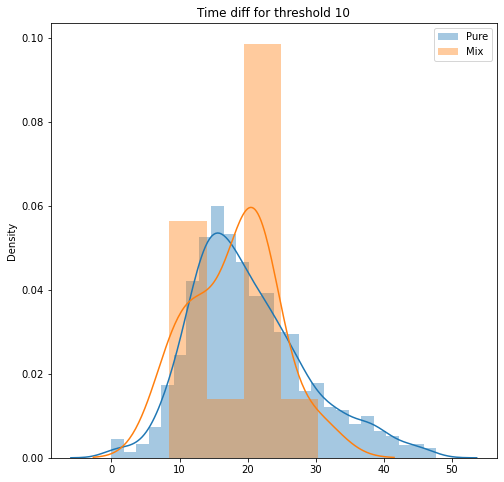

D:\AnacondaInstallation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\AnacondaInstallation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


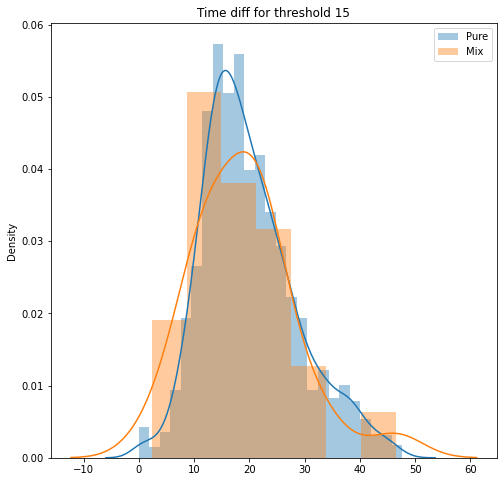

D:\AnacondaInstallation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\AnacondaInstallation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


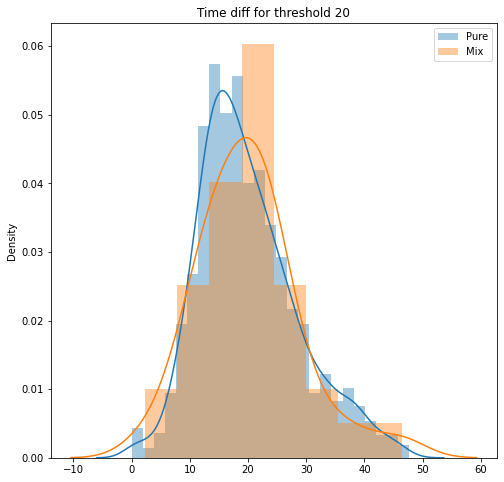

D:\AnacondaInstallation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\AnacondaInstallation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


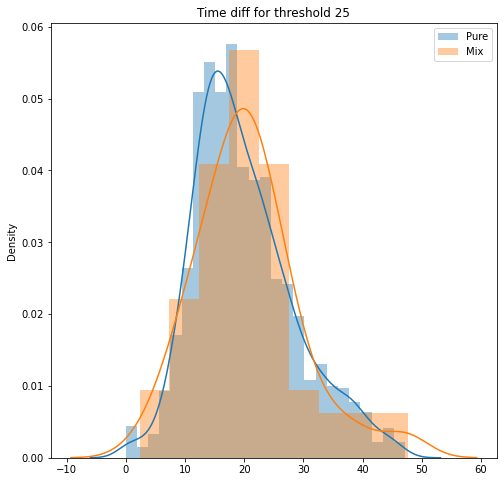

D:\AnacondaInstallation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\AnacondaInstallation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


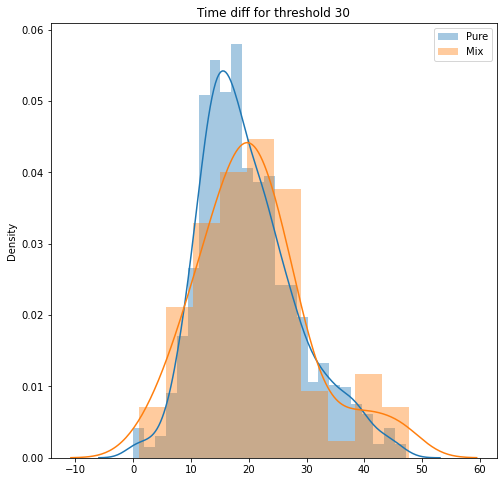

D:\AnacondaInstallation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\AnacondaInstallation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


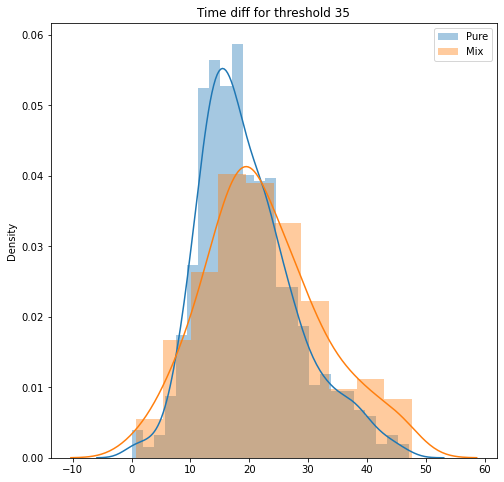

D:\AnacondaInstallation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\AnacondaInstallation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


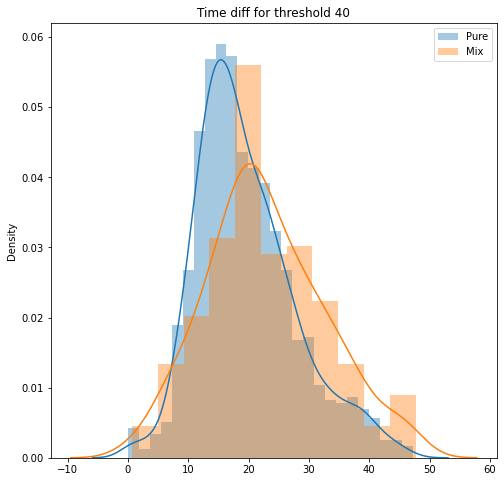

D:\AnacondaInstallation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\AnacondaInstallation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


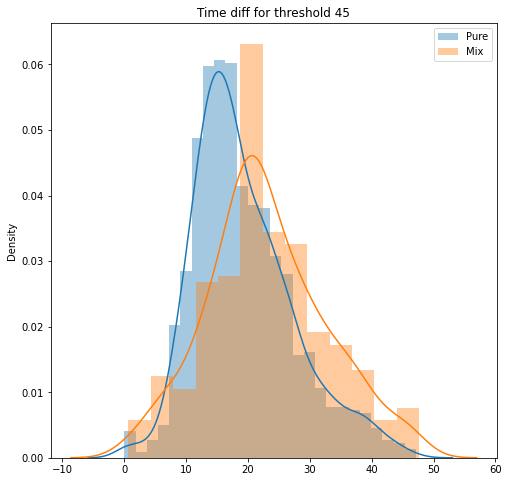

D:\AnacondaInstallation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\AnacondaInstallation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


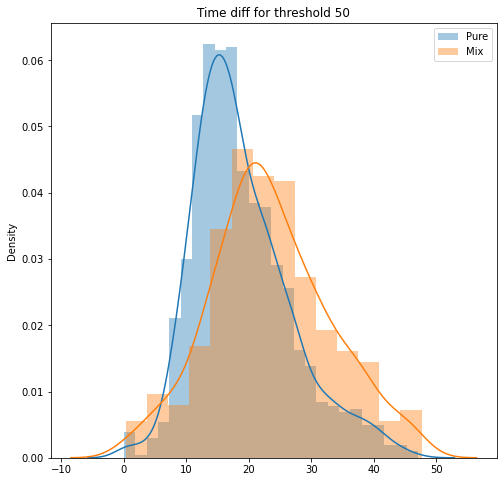

D:\AnacondaInstallation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\AnacondaInstallation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


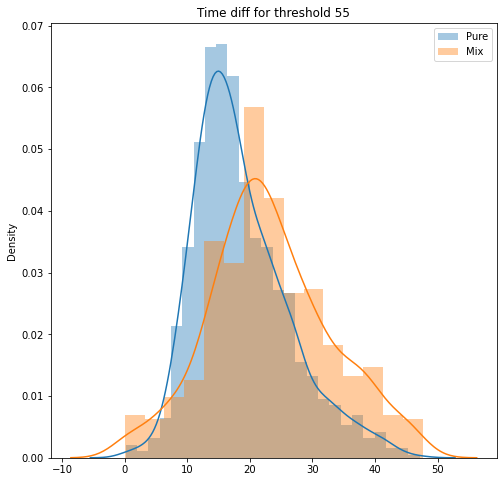

D:\AnacondaInstallation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\AnacondaInstallation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


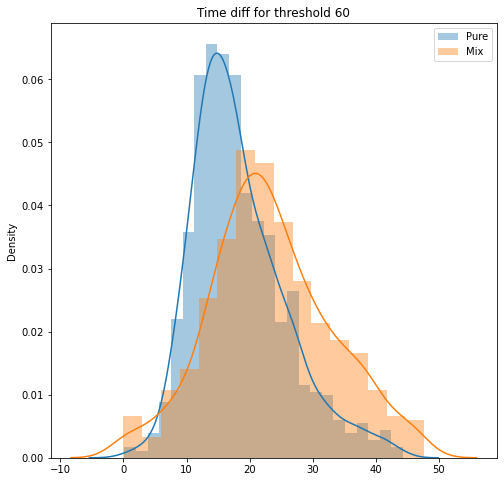

D:\AnacondaInstallation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\AnacondaInstallation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


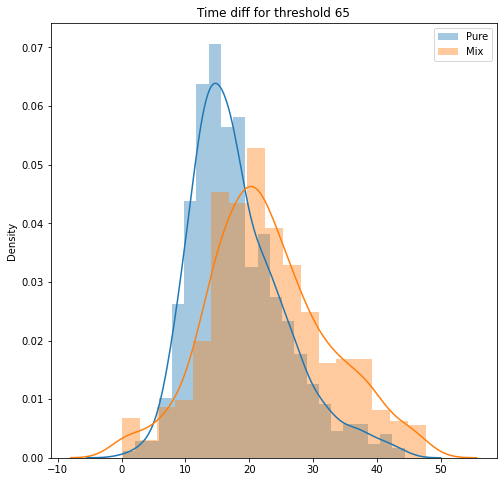

D:\AnacondaInstallation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\AnacondaInstallation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


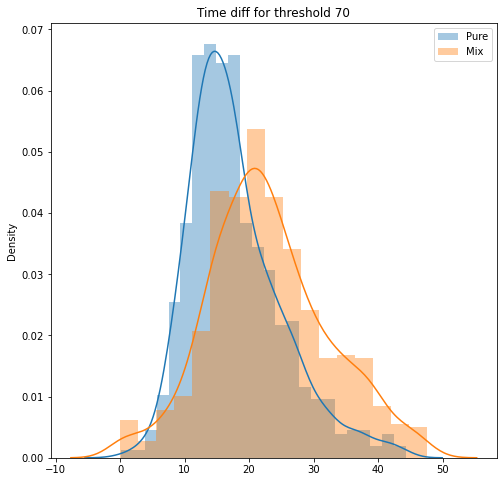

D:\AnacondaInstallation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\AnacondaInstallation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


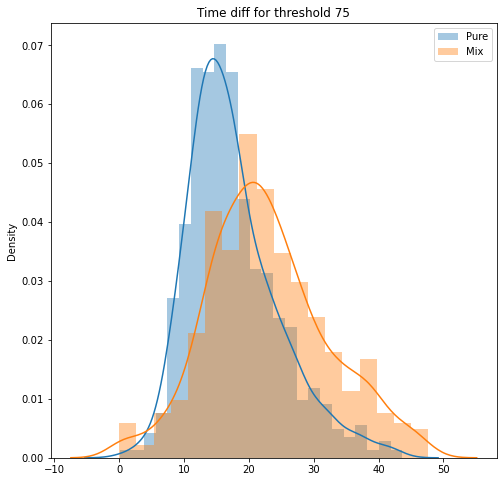

D:\AnacondaInstallation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\AnacondaInstallation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


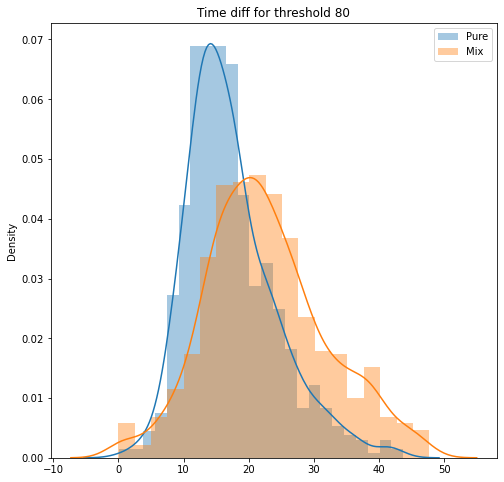

D:\AnacondaInstallation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\AnacondaInstallation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


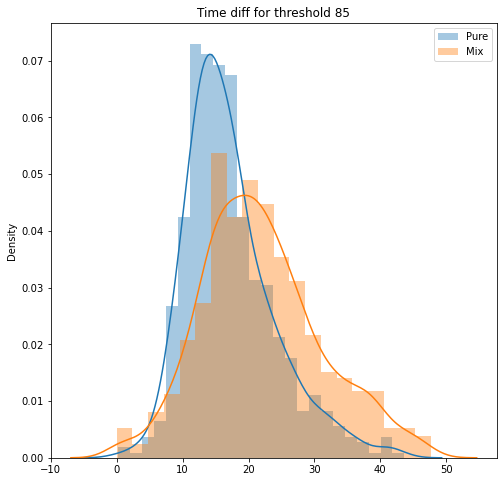

D:\AnacondaInstallation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\AnacondaInstallation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


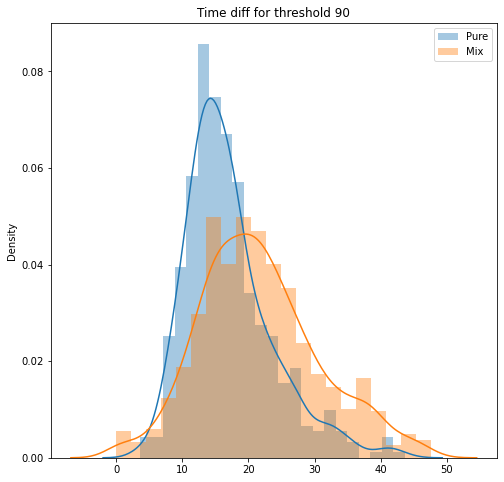

In [24]:
for i in range(10,91,5):
    get_timeplots(d,i)

D:\AnacondaInstallation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total loading', ylabel='Density'>

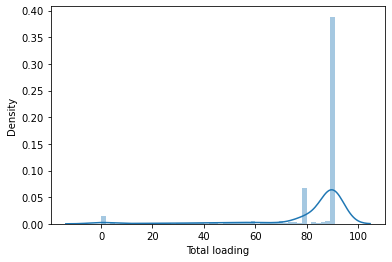

In [25]:
sns.distplot(d['Total loading'])

D:\AnacondaInstallation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\AnacondaInstallation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


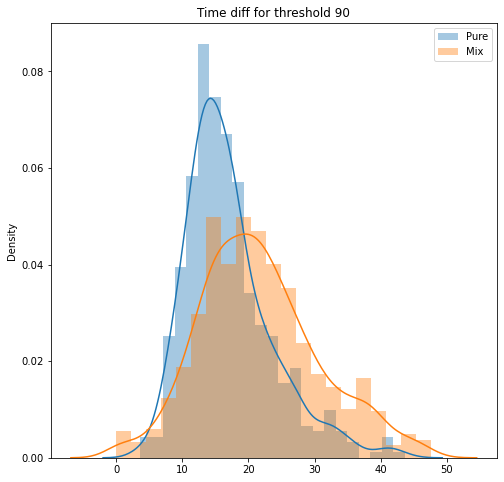

In [26]:
p90,m90 = get_timeplots(d,90,r=True)

In [27]:
np.std(p90),np.std(m90)

(6.568664263750287, 9.008206056651728)

In [28]:
st.ttest_ind(p90,m90,equal_var=False)

Ttest_indResult(statistic=-11.305632342623255, pvalue=2.167257808287229e-28)

In [29]:
np.mean(p90)

17.006054811982157

In [30]:
np.mean(m90)

21.623903281519862

In [31]:
np.mean(p90)-np.mean(m90)

-4.617848469537705